# Derivatives

 Amin Hashemian

## 1. Mathematical definition of a derivative

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

### Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return np.sin(x)*x - 1/100*x**3

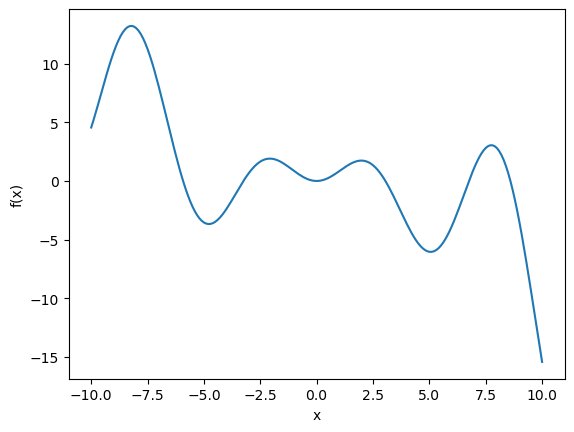

In [4]:
x_list = np.linspace(-10, 10, 201)
y_list = f(x_list)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, y_list)

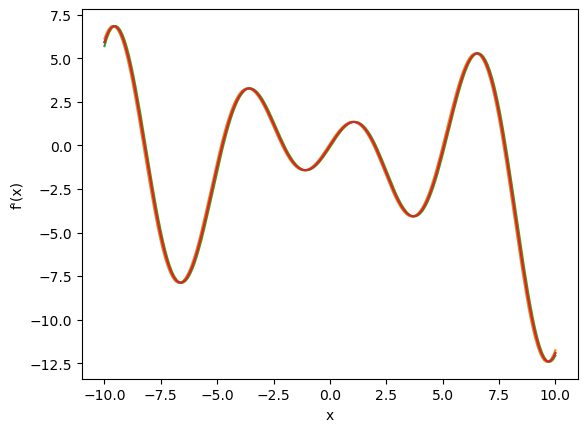

In [5]:
x_list = np.linspace(-10, 10, 201)
analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2

h = 0.1
forward_d_list = ( f(x_list+h) - f(x_list) ) / h
backward_d_list = ( f(x_list) - f(x_list-h) ) / h
central_d_list = ( f(x_list+h) - f(x_list-h) ) / (2*h)

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x_list, analytical_d_list)
plt.plot(x_list, forward_d_list)
plt.plot(x_list, backward_d_list)
plt.plot(x_list, central_d_list)

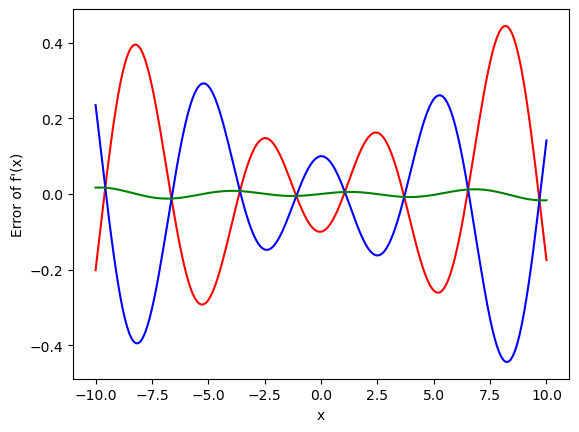

In [6]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")

plt.plot(x_list, analytical_d_list - forward_d_list, 'red')
plt.plot(x_list, analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytical_d_list - central_d_list, 'green')

### Why is central differences (typically) better than forward and backward differences?

Forward differences
\\( f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)\\)

Backward differences
\\( f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)\\)

Central differences
\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

- \\(\mathcal{O}(h^n)\\) means that the error is proportional to h^n.
- Since \\(h\\) is small, the central differences method is more accurate. 

Taylor expansion: 

\\(f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots\\)

\\(f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\\)

- From the first and second line we can imediately see the  \\(\mathcal{O}(h)\\) dependence of the forward and backward differences methods

\\(f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots\\)

\\(f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots\\)

- To find the \\(\mathcal{O}(h^2)\\) dependence of the central differences method, we have to subtract the two terms

\\(f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots\\)

\\(\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots\\)

\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

### Higher accuracy:

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [12]:
def D1Richardson(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return 1/(12*h) * ( f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h) )

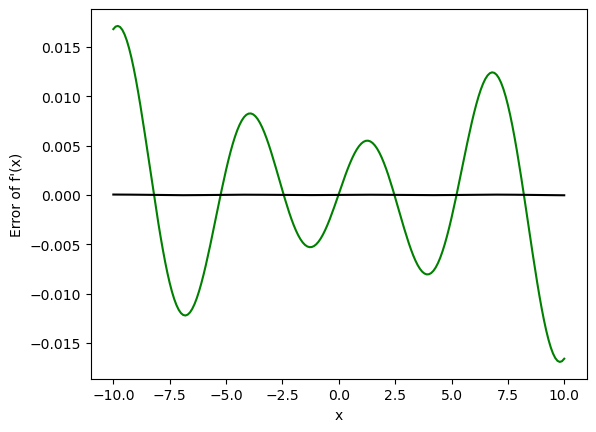

In [13]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")

richardson_d_list = D1Richardson(f, x_list, h)

#plt.plot(x_list, analytical_d_list - forward_d_list, 'red')
#plt.plot(x_list, analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytical_d_list - central_d_list, 'green')
plt.plot(x_list, analytical_d_list - richardson_d_list, 'black')

### Even higher accuracy